In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [24]:
subset = data['2019-04-15':'2019-05-30']
subset = subset.drop('nesta-8', axis=1)
subset = subset.mean(axis=1)
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [25]:
just_sundays['Marathon'] = 'Non-Marathon'
just_sundays.loc['2019-05-05', 'Marathon'] = 'Marathon'

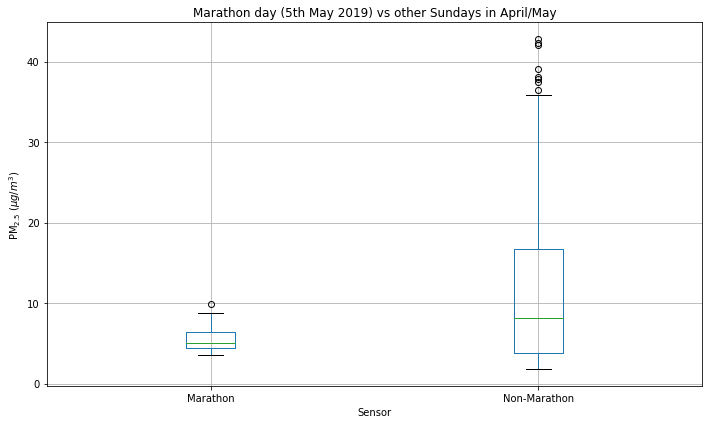

In [39]:
just_sundays.boxplot(by='Marathon', figsize=(10, 6))
plt.suptitle('')
plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Sensor')
plt.tight_layout()
plt.savefig('graphs/MarathonBoxplot.png', dpi=300)